<a href="https://colab.research.google.com/github/Aryan-Herur/IEEE_DIODE_impulse2024/blob/main/IEEEDIODE_Impulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_data_dir = "/content/drive/MyDrive/MRI/Training"
test_data_dir = "/content/drive/MyDrive/MRI/Testing"

In [ ]:
img_size=(512, 512)
batch_size=32
epochs=10

In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
datagenerator = ImageDataGenerator(rescale=1./255)

train_generator = datagenerator.flow_from_directory(
    train_data_dir,
    target_size=(img_size[0], img_size[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagenerator.flow_from_directory(
    test_data_dir,
    target_size=(img_size[0], img_size[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5708 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
#Model training
model.fit(train_generator, epochs=epochs)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/10
179/179 [==============================] - 1369s 8s/step - loss: 0.7787 - accuracy: 0.6931
Epoch 2/10
179/179 [==============================] - 148s 826ms/step - loss: 0.5518 - accuracy: 0.7803
Epoch 3/10
179/179 [==============================] - 147s 821ms/step - loss: 0.4774 - accuracy: 0.8097
Epoch 4/10
179/179 [==============================] - 147s 822ms/step - loss: 0.4149 - accuracy: 0.8392
Epoch 5/10
179/179 [==============================] - 148s 826ms/step - loss: 0.4090 - accuracy: 0.8420
Epoch 6/10
179/179 [==============================] - 148s 825ms/step - loss: 0.3913 - accuracy: 0.8464
Epoch 7/10
179/179 [==============================] - 147s 821ms/step - loss: 0.3645 - accuracy: 0.8590
Epoch 8/10
179/179 [==============================] - 148s 823ms/step - loss: 0.3545 - accuracy: 0.8658
Epoch 9/10
179/179 [==============================] - 148s 824ms/step - loss: 0.3389 - accuracy: 0.8737
Epoch 10/10
41/41 [==============================] - 739s 18s/step

In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/MRI/model.h5')
predictions=model.predict(test_generator)
y_true=test_generator.classes
y_pred=predictions.argmax(axis=1)

# Classification report
print("Classification Report:\n", sklearn.metrics.classification_report(y_true, y_pred))

14/41 [=========>....................] - ETA: 1:04:26

KeyboardInterrupt: 

In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/MRI/model.h5')

1/1 [==============================] - 3s 3s/step


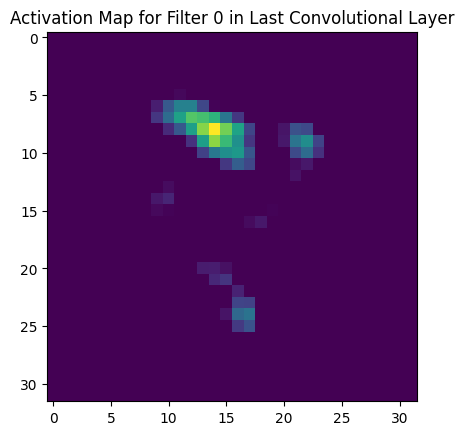

In [ ]:

img_path='/content/drive/MyDrive/MRI/Testing/glioma/Te-glTr_0009.jpg'
img=image.load_img(img_path, target_size=(512, 512))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array, axis=0)
img_array=preprocess_input(img_array)

#Last layer activation map
last_conv_layer=base_model.get_layer('block5_conv4')
activation_model=Model(inputs=base_model.input, outputs=last_conv_layer.output)


activation=activation_model.predict(img_array)


plt.imshow(activation[0, :, :, 0], cmap='viridis')
plt.title('Activation Map for Filter 0 in Last Convolutional Layer')
plt.show()

1/1 [==============================] - 0s 104ms/step


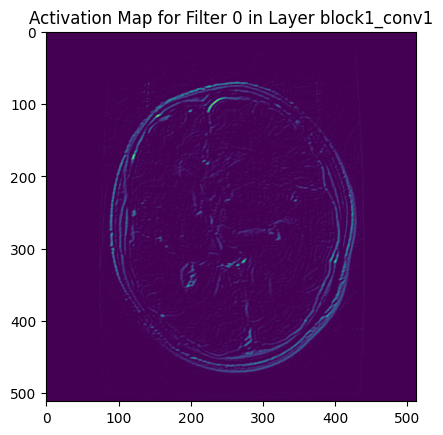

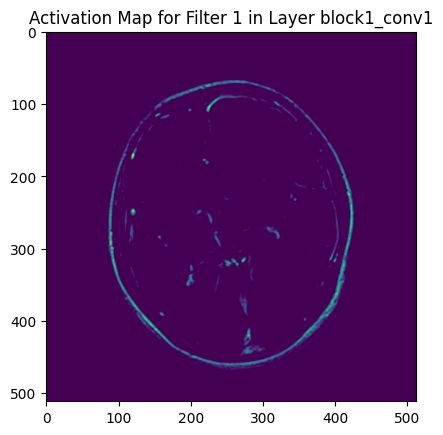

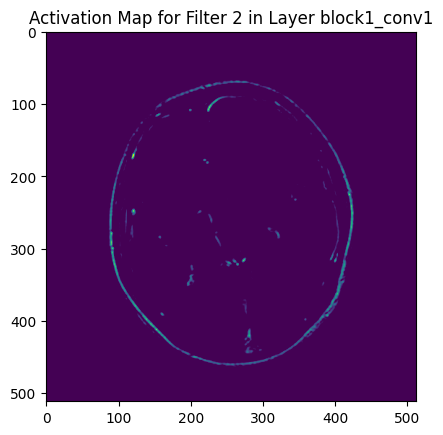

1/1 [==============================] - 0s 71ms/step


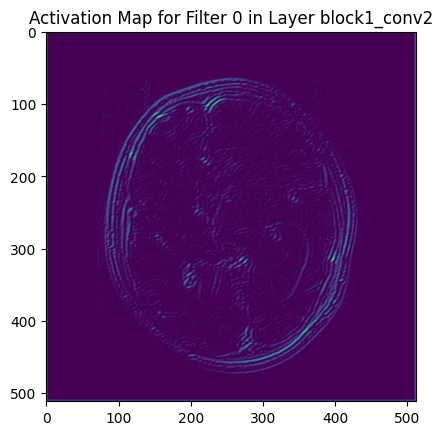

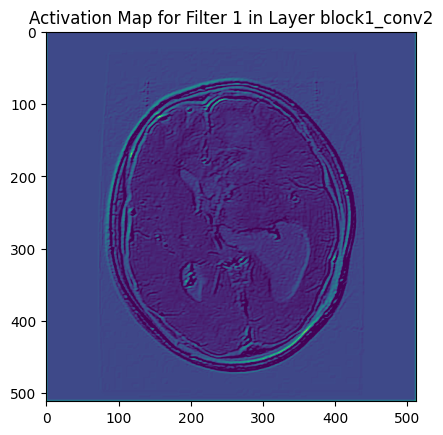

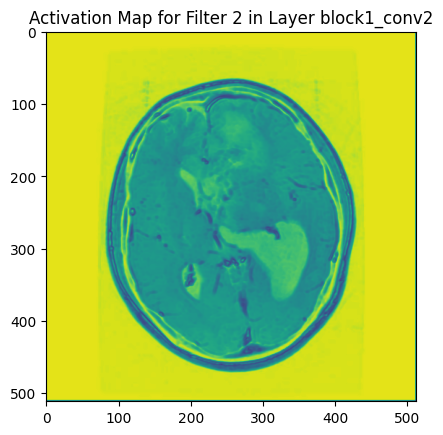

1/1 [==============================] - 0s 50ms/step


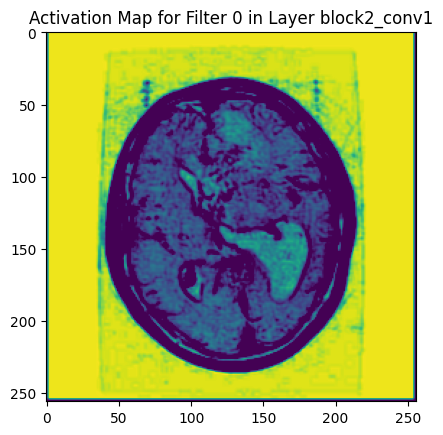

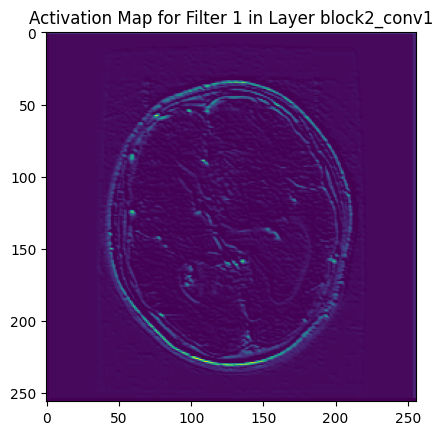

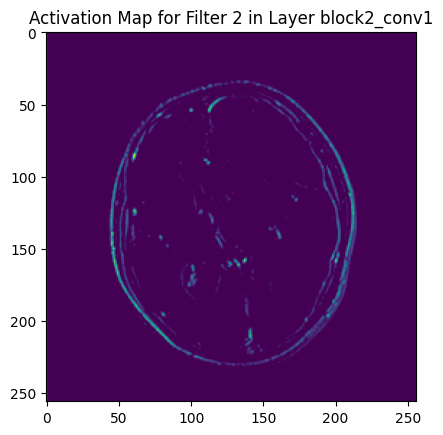

1/1 [==============================] - 0s 67ms/step


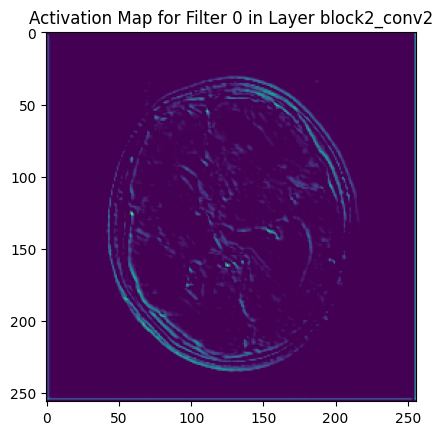

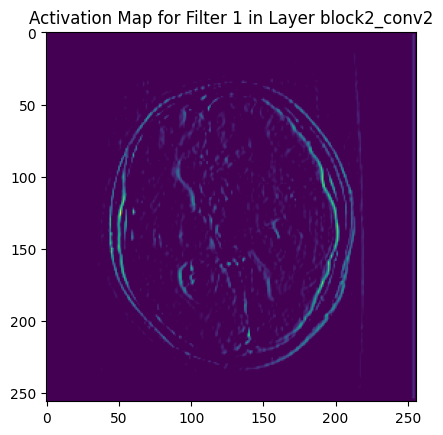

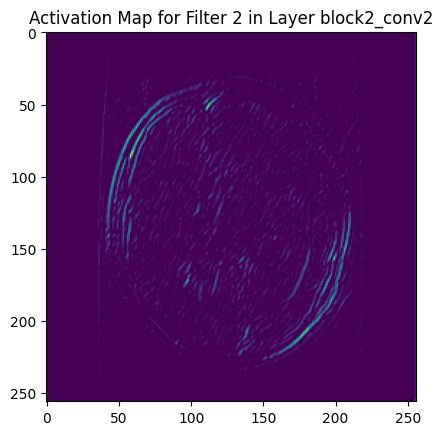

1/1 [==============================] - 0s 65ms/step


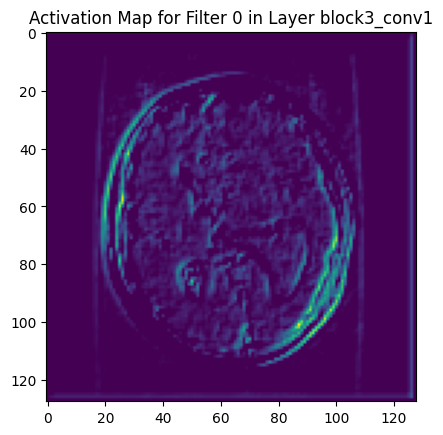

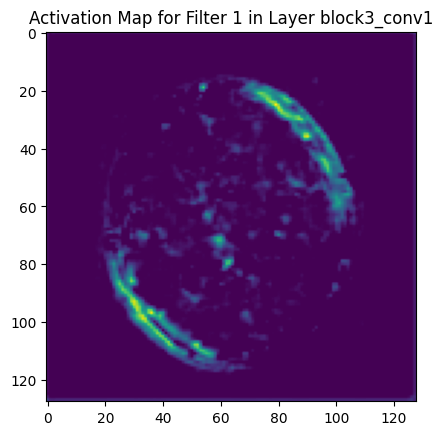

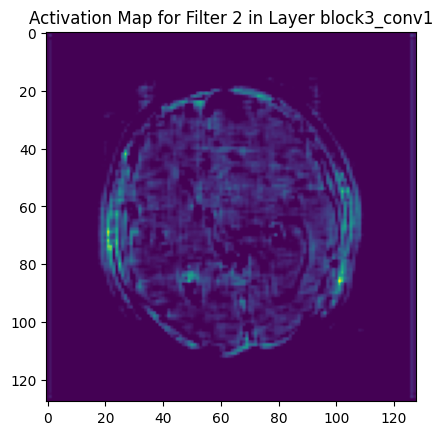

1/1 [==============================] - 0s 85ms/step


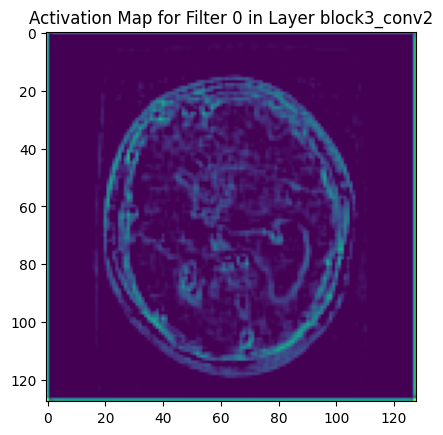

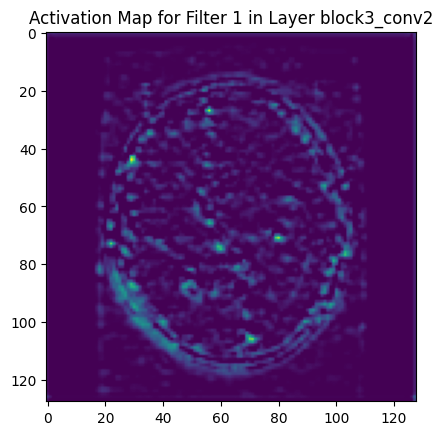

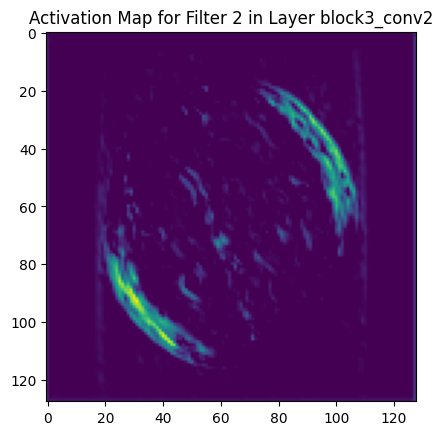

1/1 [==============================] - 0s 82ms/step


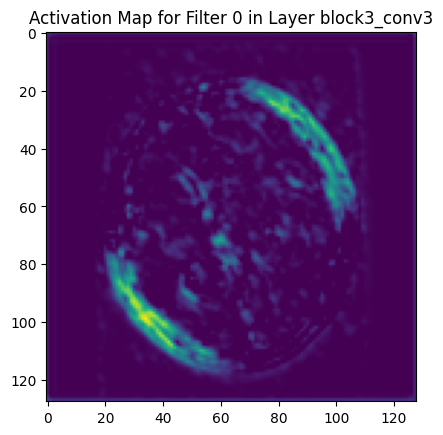

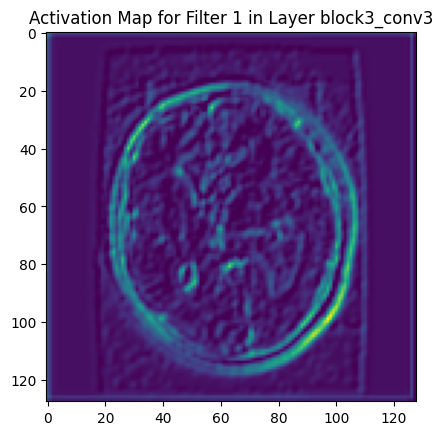

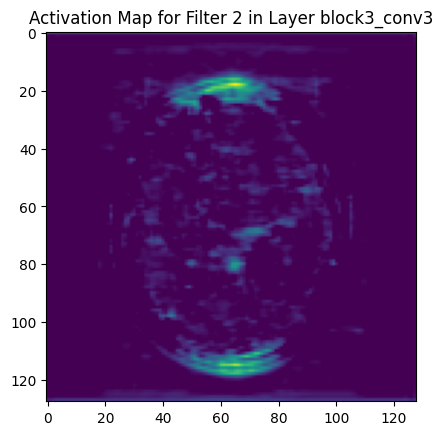

1/1 [==============================] - 0s 89ms/step


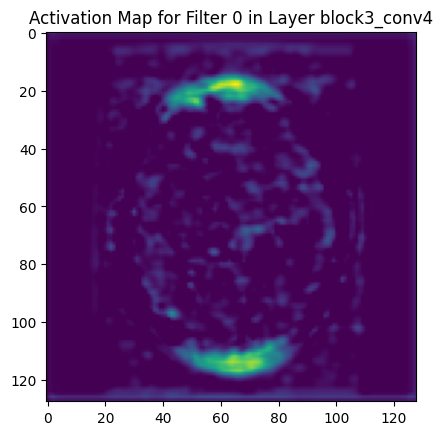

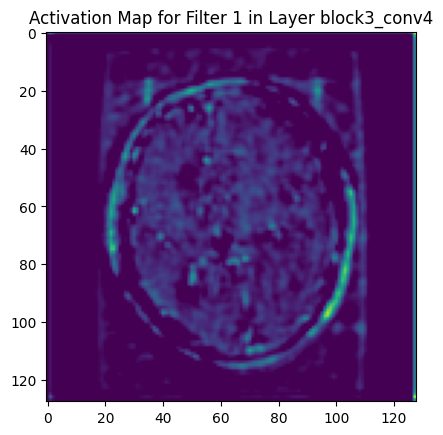

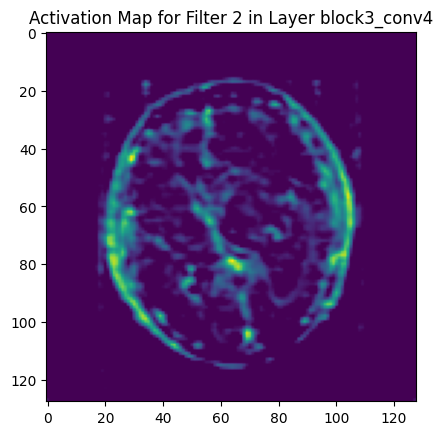

1/1 [==============================] - 0s 100ms/step


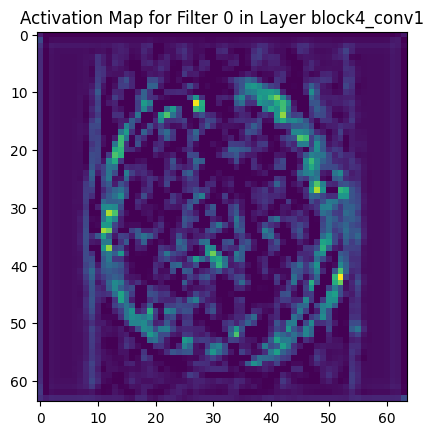

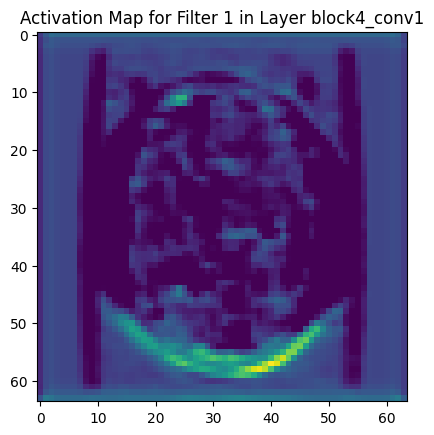

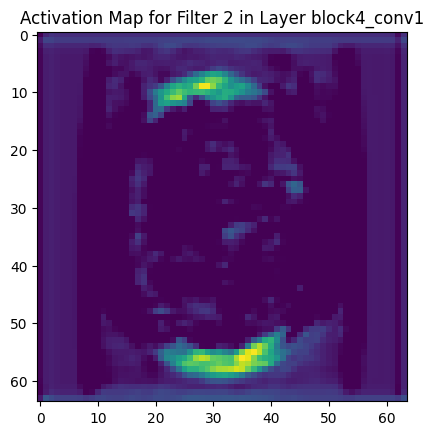

1/1 [==============================] - 0s 98ms/step


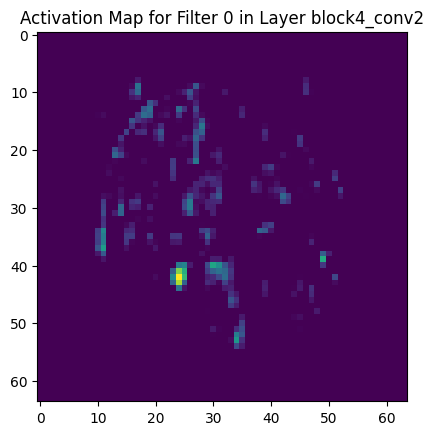

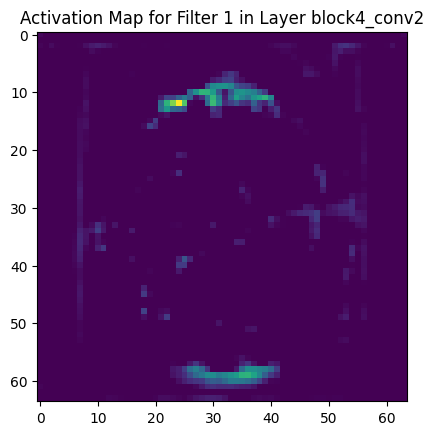

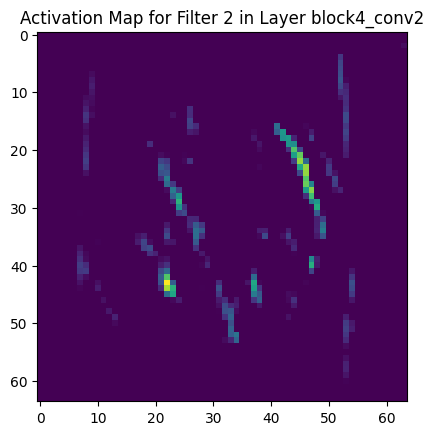

1/1 [==============================] - 0s 110ms/step


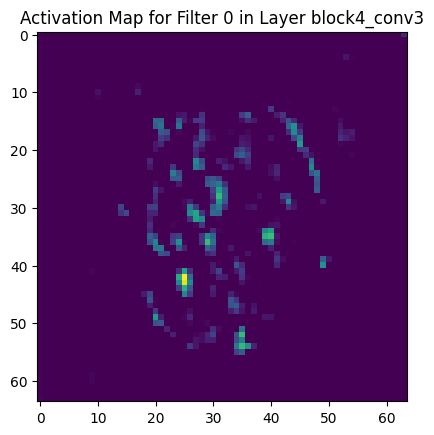

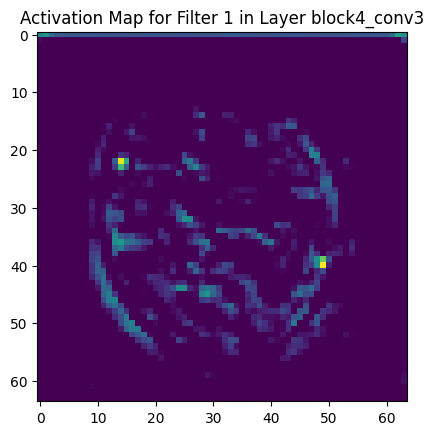

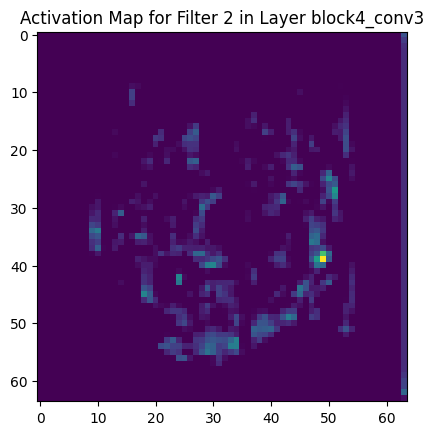

1/1 [==============================] - 0s 113ms/step


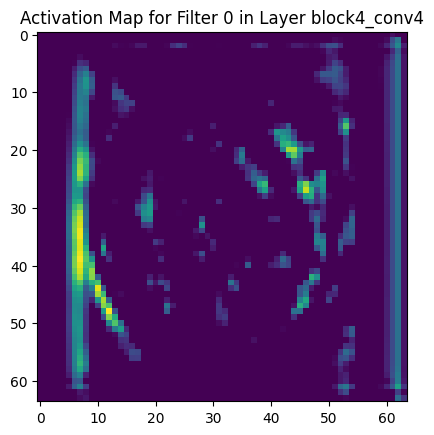

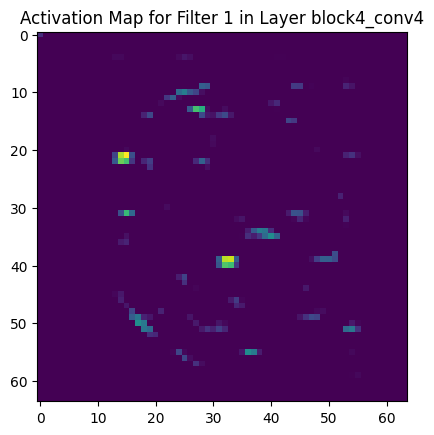

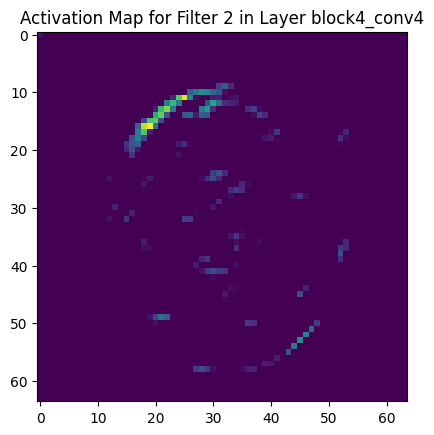

1/1 [==============================] - 0s 168ms/step


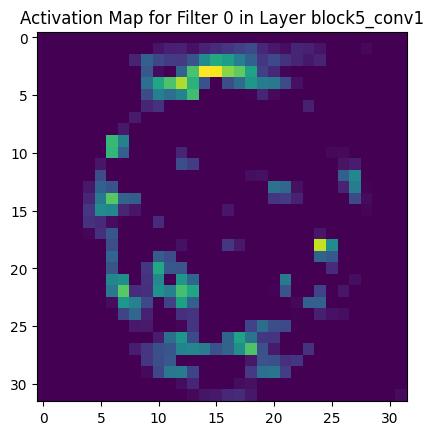

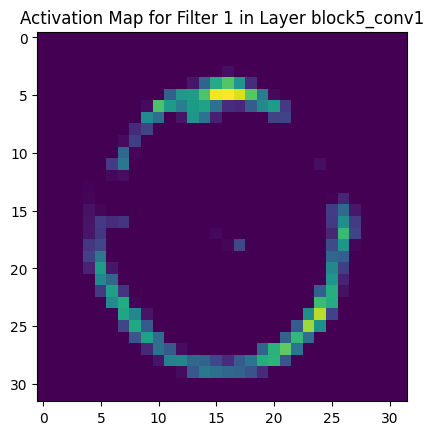

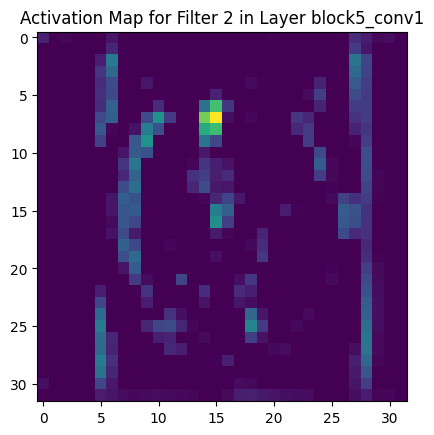

1/1 [==============================] - 0s 193ms/step


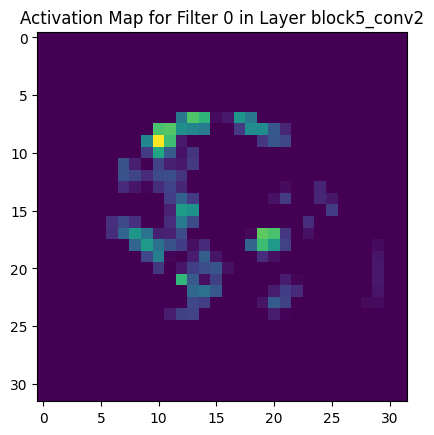

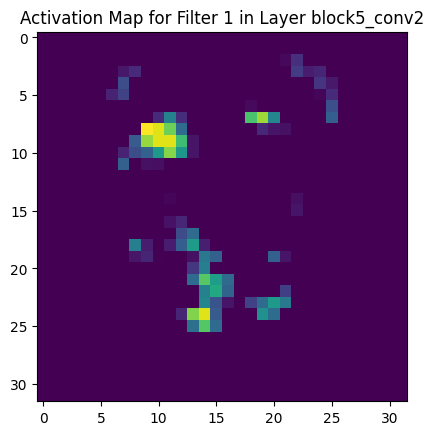

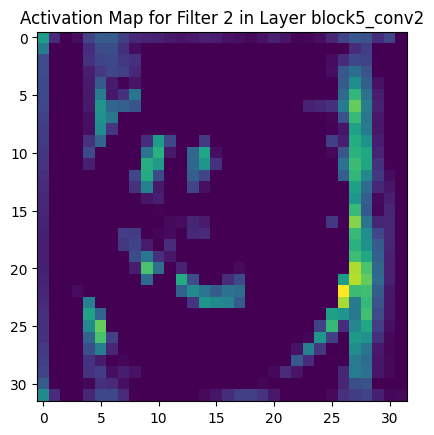

1/1 [==============================] - 0s 194ms/step


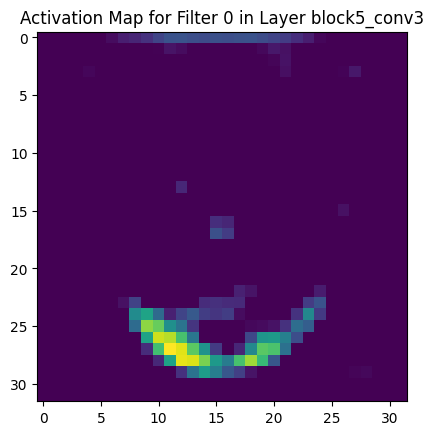

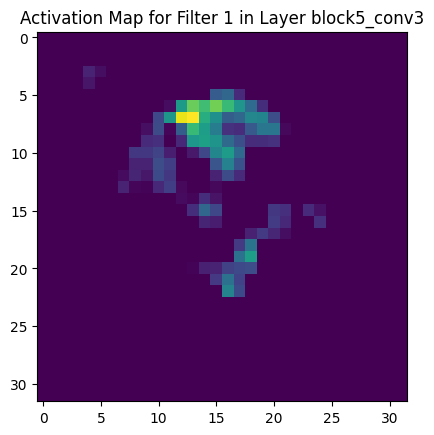

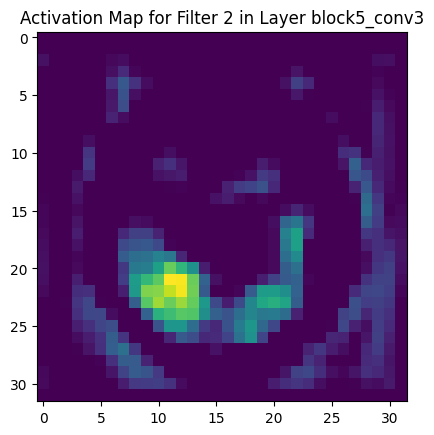

1/1 [==============================] - 0s 205ms/step


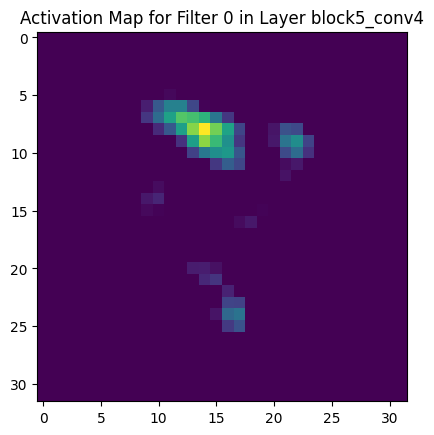

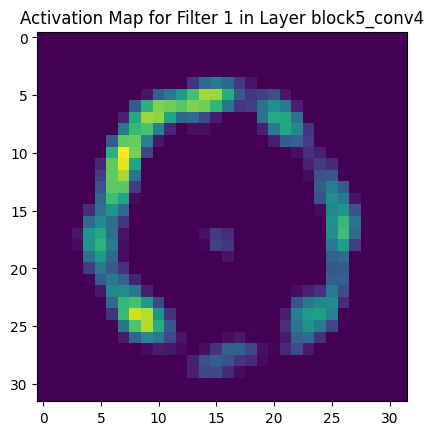

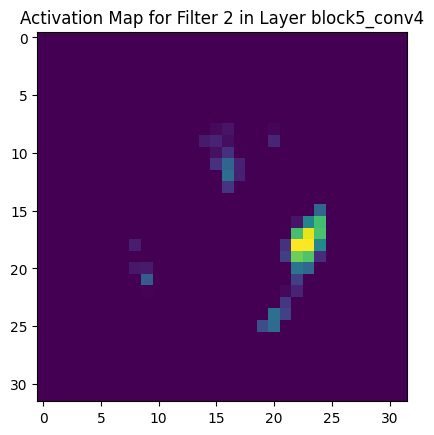

In [ ]:
img_path='/content/drive/MyDrive/MRI/Testing/glioma/Te-glTr_0009.jpg'
img=image.load_img(img_path, target_size=(512, 512))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array, axis=0)
img_array=preprocess_input(img_array)

# Get 3 filters from each convolution layer
for layer in base_model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
        # Map of current layer
        layer_name=layer.name
        activation_model=Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)

        activations=activation_model.predict(img_array)

        filter_indices=[0, 1, 2]

        for filter_index in filter_indices:
            plt.figure()
            plt.imshow(activations[0, :, :, filter_index], cmap='viridis')
            plt.title(f'Activation Map for Filter {filter_index} in Layer {layer_name}')
            plt.show()

In [ ]:
class_scores=model.predict(img_array)
img_array=image.img_to_array(img)
# Get the max unnormalized Sc
pred_class_index=np.argmax(class_scores)

Sc=class_scores[0, pred_class_index]

print(f"Index of predicted class: {pred_class_index}")
print(f"(Sc): {Sc}")

NameError: name 'img_array' is not defined

In [ ]:
y_true = test_generator.classes
print(y_true)

[0 0 0 ... 3 3 3]


In [ ]:
#Map for classes
class_indices_mapping=train_generator.class_indices

print("Class Indices Mapping:", class_indices_mapping)


Class Indices Mapping: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [ ]:

def input_img(path):
    image=tf.image.decode_png(tf.io.read_file(path))
    image=tf.expand_dims(image, axis=0)
    image=tf.cast(image, tf.float32)
    image=tf.image.resize(image, [512,512])
    return image
def normalize_image(img):
    grads_norm=img[:,:,0]+ img[:,:,1]+ img[:,:,2]
    grads_norm=(grads_norm - tf.reduce_min(grads_norm))/ (tf.reduce_max(grads_norm)- tf.reduce_min(grads_norm))
    return grads_norm
path='/content/drive/MyDrive/MRI/Testing/glioma/Te-glTr_0009.jpg'

def plot_maps(img1, img2,vmin=0.3,vmax=0.7, mix_val=2):
    f=plt.figure(figsize=(15,45))
    plt.subplot(1,3,1)
    plt.imshow(img1,vmin=vmin, vmax=vmax, cmap="ocean")
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(img2, cmap = "ocean")
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(img1*mix_val+img2/mix_val, cmap = "ocean" )
    plt.axis("off")

In [ ]:
test_model=tf.keras.models.load_model('/content/drive/MyDrive/MRI/model.h5')
test_model.trainable=False
#Glioma------------
img_path='/content/drive/MyDrive/MRI/Testing/glioma/Te-glTr_0008.jpg'
input_img=input_img(img_path)
input_img=tf.keras.applications.densenet.preprocess_input(input_img)
plt.imshow(normalize_image(input_img[0]), cmap = "ocean")
result=test_model(input_img)
max_idx=tf.argmax(result,axis = 1)

with tf.GradientTape() as tape:
    tape.watch(input_img)
    result = test_model(input_img)
    max_score = result[0,max_idx[0]]
grads = tape.gradient(max_score, input_img)
plot_maps(normalize_image(grads[0]), normalize_image(input_img[0]))

NameError: name 'input_img' is not defined

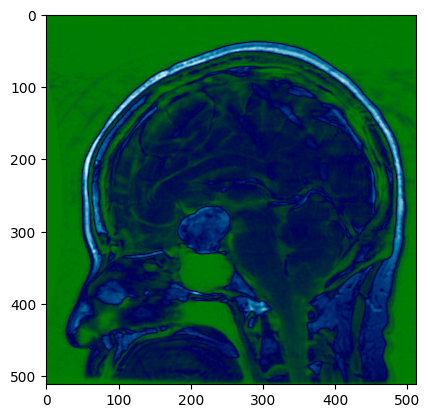

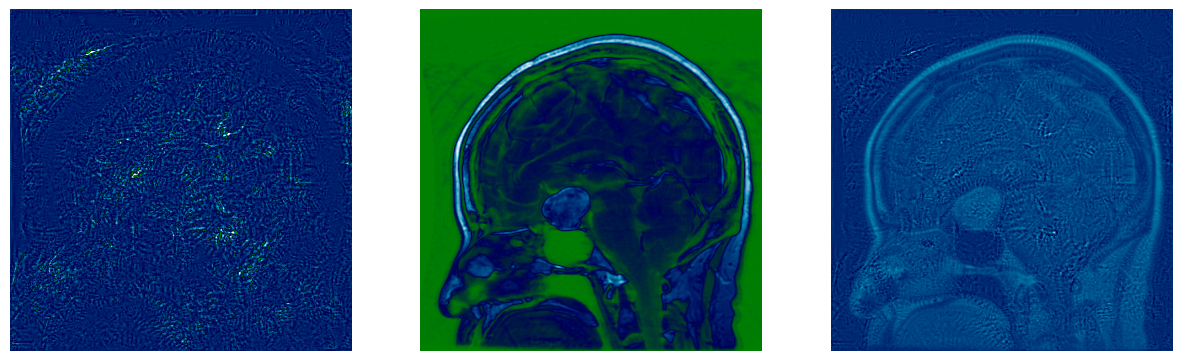

In [ ]:
#Pituitary--------------
test_model=tf.keras.models.load_model('/content/drive/MyDrive/MRI/model.h5')
test_model.trainable = False
img_path='/content/drive/MyDrive/MRI/Testing/pituitary/Te-piTr_0008.jpg'
input_img=input_img(img_path)
input_img=tf.keras.applications.densenet.preprocess_input(input_img)
plt.imshow(normalize_image(input_img[0]), cmap = "ocean")
result=test_model(input_img)
max_idx=tf.argmax(result,axis = 1)
with tf.GradientTape() as tape:
    tape.watch(input_img)
    result=test_model(input_img)
    max_score=result[0,max_idx[0]]
grads=tape.gradient(max_score, input_img)
plot_maps(normalize_image(grads[0]), normalize_image(input_img[0]))

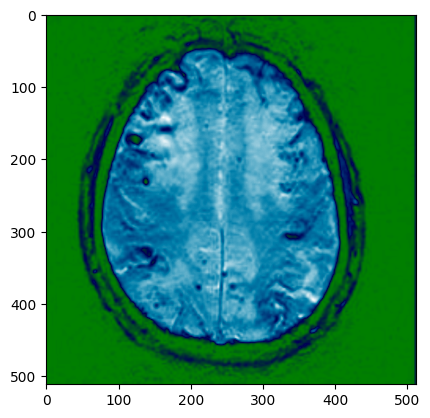

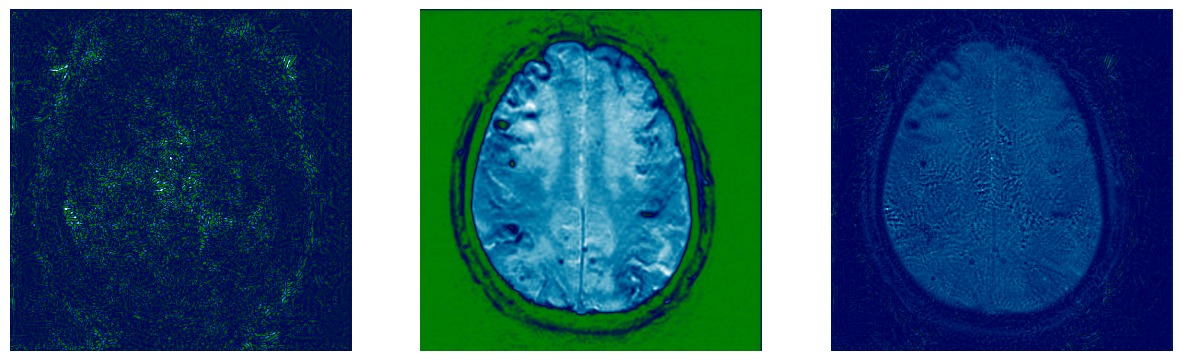

In [ ]:
#Notumor-------------------
test_model=tf.keras.models.load_model('/content/drive/MyDrive/MRI/model.h5')
test_model.trainable = False
img_path='/content/drive/MyDrive/MRI/Testing/notumor/Te-noTr_0008.jpg'
input_img=input_img(img_path)
input_img=tf.keras.applications.densenet.preprocess_input(input_img)
plt.imshow(normalize_image(input_img[0]), cmap = "ocean")
result=test_model(input_img)
max_idx=tf.argmax(result,axis = 1)
with tf.GradientTape() as tape:
    tape.watch(input_img)
    result=test_model(input_img)
    max_score=result[0,max_idx[0]]
grads=tape.gradient(max_score, input_img)
plot_maps(normalize_image(grads[0]), normalize_image(input_img[0]))

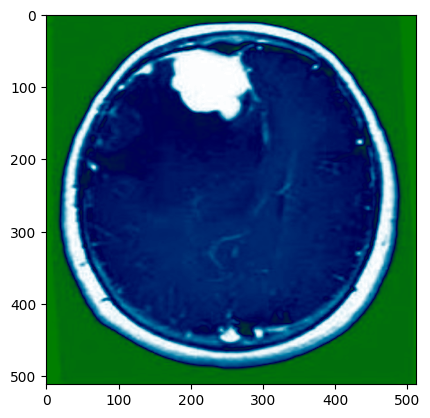

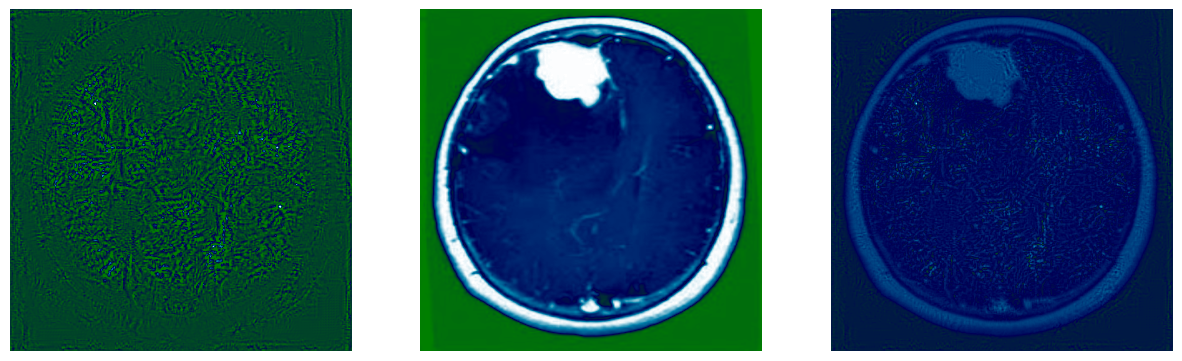

In [ ]:
#Meningioma-------------
test_model=tf.keras.models.load_model('/content/drive/MyDrive/MRI/model.h5')
test_model.trainable = False
img_path='/content/drive/MyDrive/MRI/Testing/meningioma/Te-meTr_0008.jpg'
input_img=input_img(img_path)
input_img=tf.keras.applications.densenet.preprocess_input(input_img)
plt.imshow(normalize_image(input_img[0]), cmap = "ocean")
result=test_model(input_img)
max_idx=tf.argmax(result,axis = 1)
with tf.GradientTape() as tape:
    tape.watch(input_img)
    result=test_model(input_img)
    max_score=result[0,max_idx[0]]
grads=tape.gradient(max_score, input_img)
plot_maps(normalize_image(grads[0]), normalize_image(input_img[0]))